Used in the book https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Appendix-E-Ensemble-Kalman-Filters.ipynb

https://github.com/rlabbe/filterpy Actively maintained

http://filterpy.readthedocs.io/en/latest/

http://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html

Experiment with varying dt, which is the responsiveness of the filter.

In [2]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
%matplotlib inline

Parameters:

dim_x : int
Number of state variables for the Kalman filter. For example, if you are tracking the position and velocity of an object in two dimensions, dim_x would be 4. This is used to set the default size of P, Q, and u

dim_z : int
Number of of measurement inputs. For example, if the sensor provides you with position in (x,y), dim_z would be 2.

# 2D model
2D model predicting the position (_p) and velocity (_v)

In [8]:
my_filter = KalmanFilter(dim_x=2, dim_z=1)

In [101]:
dt=0.05         # The delta, how responsive the filter is, experiment with different values
my_filter.x = np.array([[2.],
                [0.]])       # initial state (location and velocity)

my_filter.F = np.array([[1.,1.],
                [0.,1.]])    # state transition matrix

my_filter.H = np.array([[1.,0.]])    # Measurement function
my_filter.P *= 1000.                 # covariance matrix
my_filter.R = 5                      # state uncertainty
my_filter.Q = Q_discrete_white_noise(2, dt, .1) # process uncertainty/noise

In [102]:
def get_some_measurement(i):
    """Helper function to simulate measured data."""
    return np.sin(i/(4*2*np.pi)) + 1.0*np.random.random()

get_some_measurement(50)

1.3154365355703865

In [132]:
measurement = []
prediction_p = []
filter_result_p = []
prediction_v = []
filter_result_v = []

v_amp = 30 # Velocity has lower amplitude so multiply

for i in range(300):
    my_filter.predict()  # Predicition
    prediction_p.append(my_filter.get_prediction()[0][0][0])
    prediction_v.append(my_filter.get_prediction()[0][1][0] * v_amp)
    
    measurement.append(get_some_measurement(i)) # Get a measurement
    my_filter.update(measurement[i])

    # do something with the output
    filter_result_p.append(my_filter.x[0][0])
    filter_result_v.append(my_filter.x[1][0] * v_amp)

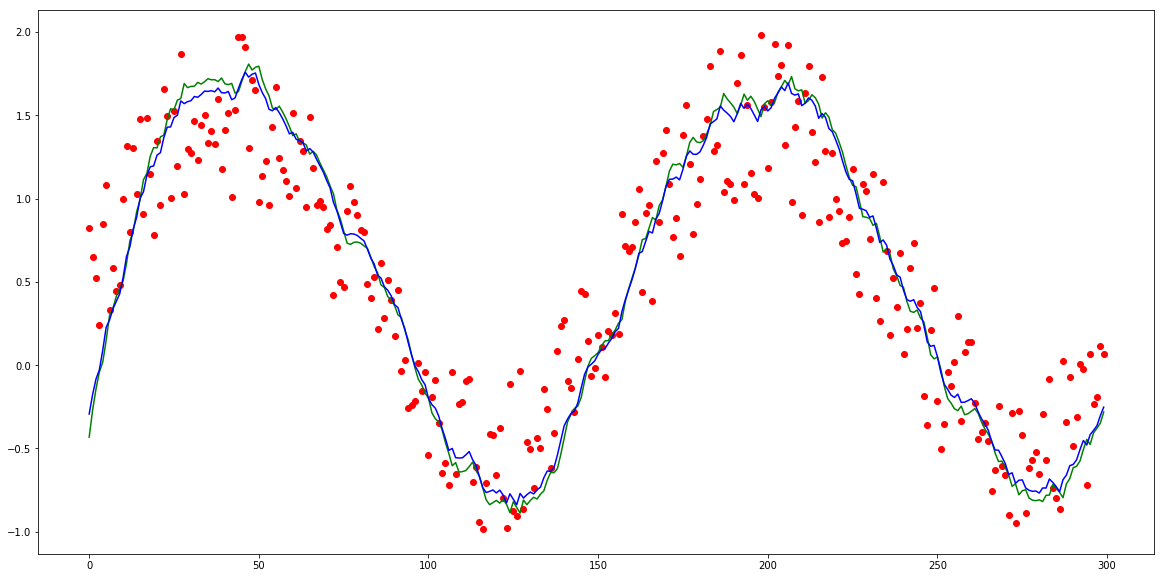

In [136]:
fig  = plt.figure(figsize=(20,10))
plt.plot(measurement, 'ro')
plt.plot(prediction_p, 'g')
plt.plot(filter_result_p, 'b');

if not True:
    plt.plot(prediction_v, 'k--') 
    plt.plot(filter_result_v, 'm--');
plt.legend()

In [24]:
my_filter.get_prediction()[0][0][0]

0.5957173824746055

In [109]:
my_filter.get_prediction()[0][1][0]

0.006825180198067056

In [128]:
my_filter.x[1][0]

0.0029634252701441987